In [3]:
from google.colab import files
uploaed = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

link = 'https://docs.google.com/spreadsheets/d/1NZIkjU20jZlSfFug4BQUkXiJ7kiVhBF0/edit?usp=drive_link&ouid=106599942506044215410&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_excel(path)
data = pd.read_csv('imbalanced_data.csv')

Saving imbalanced_data.csv to imbalanced_data.csv


In [4]:
df

,WL,R
0,380,12.078770
1,381,11.826804
2,382,12.090058
3,383,12.329763
4,384,12.224075
...,...,...
396,776,17.688067
397,777,17.726148
398,778,17.669751
399,779,17.647554


In [5]:
data

,x1,x2,x3,x4,x5,y
0,-10.800342,3.172799,5.239638,7.307207,5.994013,0
1,-14.990925,3.017590,3.977746,5.360931,4.784813,0
2,-11.717584,1.484062,6.603974,7.225007,3.876819,0
3,-10.977639,4.676936,6.553846,7.233869,4.575602,0
4,-12.325822,2.746790,5.453274,4.684579,2.429539,0
...,...,...,...,...,...,...
985,-11.634486,2.082369,4.837779,4.074321,6.678578,0
986,-10.930288,1.927491,4.471644,8.255894,6.459318,0
987,-12.592138,2.211808,6.383534,3.825391,2.505188,0
988,-11.397795,2.734885,5.705916,5.663749,5.606066,0


In [6]:
df.describe()

,WL,R
count,401.000000,401.000000
mean,580.000000,18.558105
std,115.902977,1.891551
min,380.000000,11.826804
25%,480.000000,18.041187
50%,580.000000,19.165058
75%,680.000000,19.931663
max,780.000000,20.320212


In [7]:
x = df['WL']
y = df.R

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, random_state = 0)


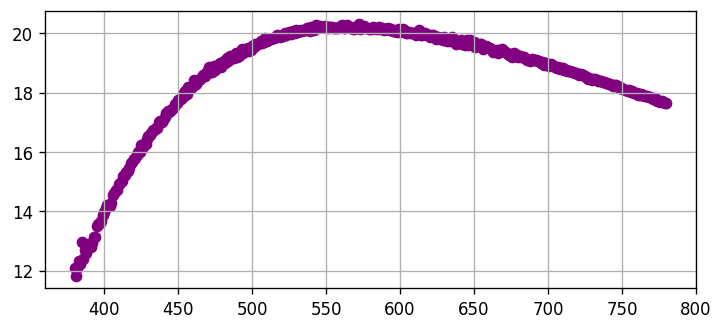

In [8]:
plt.scatter(x, y, color = 'purple', marker ='o')
plt.grid()

In [9]:
data.describe()

,x1,x2,x3,x4,x5,y
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,-11.722947,3.153064,4.865289,5.863236,5.105038,0.141414
std,1.258098,1.066765,1.050373,1.050165,1.063673,0.348624
min,-15.273528,-0.695825,1.216528,1.938383,1.102308,0.000000
25%,-12.581926,2.421648,4.138726,5.144672,4.397746,0.000000
50%,-11.824429,3.169161,4.865084,5.857036,5.086116,0.000000
75%,-10.977791,3.827284,5.598190,6.575743,5.832102,0.000000
max,-7.319448,6.526590,8.463713,9.010749,8.212693,1.000000


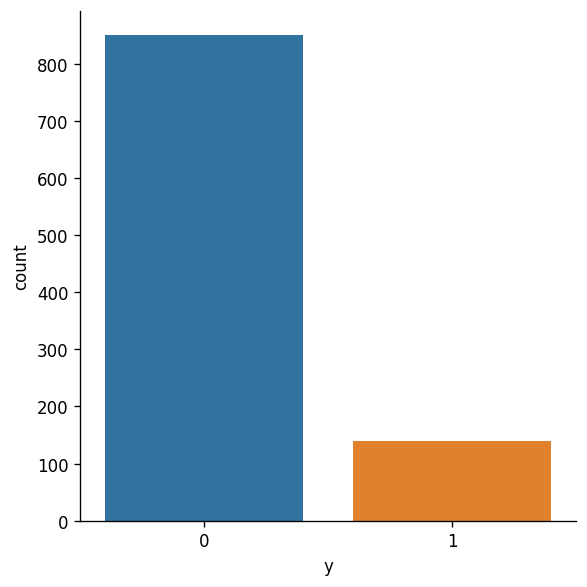

In [10]:
import seaborn as sns

sns.catplot(x='y', data = data, kind = 'count')
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      990 non-null    float64
 1   x2      990 non-null    float64
 2   x3      990 non-null    float64
 3   x4      990 non-null    float64
 4   x5      990 non-null    float64
 5   y       990 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 46.5 KB


In [13]:
data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

In [15]:
x = data.drop(columns = ["y"])
y = data["y"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

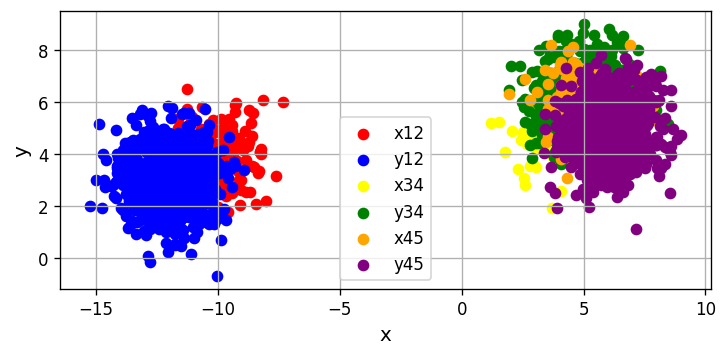

In [31]:
# vẽ hình thể hiện các biến

plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.grid()

plt.scatter(x[y.isin([1])].x1, x[y.isin([1])].x2, c = 'red', label = 'x12')
plt.scatter(x[y.isin([0])].x1, x[y.isin([0])].x2, c = 'blue', label = 'y12')
plt.scatter(x[y.isin([1])].x3, x[y.isin([1])].x4, c = 'yellow', label = 'x34')
plt.scatter(x[y.isin([0])].x3, x[y.isin([0])].x4, c = 'green', label = 'y34')
plt.scatter(x[y.isin([1])].x4, x[y.isin([1])].x5, c = 'orange', label = 'x45')
plt.scatter(x[y.isin([0])].x4, x[y.isin([0])].x5, c = 'purple', label = 'y45')


plt.legend()

In [34]:
# độ chính xác của mô hình
model.score(x_test, y_test)

0.9431818181818182

In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
print(score)

0.9431818181818182


In [37]:
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[668,   6],
       [ 39,  79]])

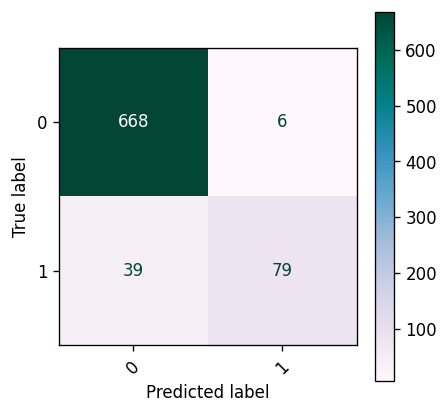

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (4,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, xticks_rotation = 45, ax = ax, colorbar = True, cmap = 'PuBuGn')